In [14]:

import pandas as pd

df = pd.read_csv('train.csv')

In [15]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [16]:
df['total_length'] = df['comment_text'].apply(len)
df['capitals'] = df['comment_text'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
df['caps_vs_length'] = df.apply(lambda row: float(row['capitals'])/float(row['total_length']),
                                axis=1)
df['num_exclamation_marks'] = df['comment_text'].apply(lambda comment: comment.count('!'))
df['num_question_marks'] = df['comment_text'].apply(lambda comment: comment.count('?'))
df['num_punctuation'] = df['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in '.,;:'))
df['num_words'] = df['comment_text'].apply(lambda comment: len(comment.split()))
df['num_unique_words'] = df['comment_text'].apply(
    lambda comment: len(set(w for w in comment.split())))
df['words_vs_unique'] = df['num_unique_words'] / df['num_words']
df['num_smilies'] = df['comment_text'].apply(
    lambda comment: sum(comment.count(w) for w in (':-)', ':)', ';-)', ';)')))

In [17]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,total_length,capitals,caps_vs_length,num_exclamation_marks,num_question_marks,num_punctuation,num_words,num_unique_words,words_vs_unique,num_smilies
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,17,0.064394,0,1,6,43,41,0.953488,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,8,0.071429,1,0,5,17,17,1.000000,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233,4,0.017167,0,0,4,42,39,0.928571,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622,11,0.017685,0,0,6,113,82,0.725664,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67,2,0.029851,0,1,3,13,13,1.000000,0


In [19]:
features = ('total_length', 'capitals', 'caps_vs_length', 'num_exclamation_marks',
            'num_question_marks', 'num_punctuation', 'num_words', 'num_unique_words',
            'words_vs_unique', 'num_smilies')
columns = ('toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate')

rows = [{c:df[f].corr(df[c]) for c in columns} for f in features]
df_correlations = pd.DataFrame(rows, index=features)

In [20]:
df_correlations

,identity_hate,insult,obscene,severe_toxic,threat,toxic
total_length,-0.013647,-0.045052,-0.042945,0.010131,-0.008011,-0.054470
capitals,0.053576,0.075945,0.081691,0.143410,0.033581,0.091175
caps_vs_length,0.093726,0.170384,0.182452,0.169243,0.055596,0.220777
num_exclamation_marks,0.006005,0.027010,0.024362,0.060578,0.034202,0.037337
num_question_marks,-0.000516,0.004859,0.005404,-0.004541,-0.003949,0.027820
num_punctuation,-0.021698,-0.049487,-0.044119,-0.010763,-0.003723,-0.056714
num_words,-0.014493,-0.043642,-0.042207,0.008452,-0.006688,-0.052444
num_unique_words,-0.032796,-0.080960,-0.080942,-0.048377,-0.020279,-0.096256
words_vs_unique,0.010632,0.043348,0.042755,-0.027050,-0.004020,0.056491
num_smilies,0.001206,-0.004066,-0.003254,-0.002564,-0.001524,-0.003833


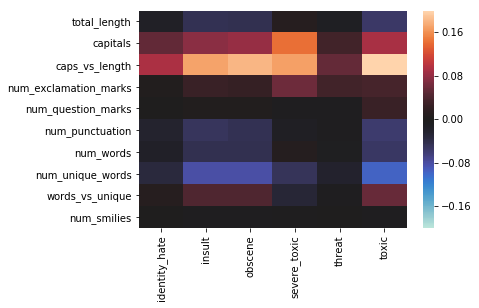

In [21]:
import seaborn as sns
ax = sns.heatmap(df_correlations, vmin=-0.2, vmax=0.2, center=0.0)

AttributeError: 'AxesSubplot' object has no attribute 'show'